In [1]:
 !pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
rawData = open("SpamCollection.csv").read()

# Print the raw data
rawData[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [5]:
parsedData = rawData.replace('\t', '\n').split('\n')

In [6]:
parsedData[0:5]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam']

In [7]:
labelList = parsedData[0::2]
textList = parsedData[1::2]

In [8]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [9]:
print(len(labelList))
print(len(textList))

5575
5574


In [10]:
print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [11]:
#make "label" and "sms" same size. 
fullCorpus = pd.DataFrame({
    'label': labelList[:-1],
    'sms': textList
})
fullCorpus.head()

label                                                sms
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [12]:
df = pd.read_csv("SpamCollection.csv", sep='\t',header = None)
df.columns = ['label','text']
df.head()

label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

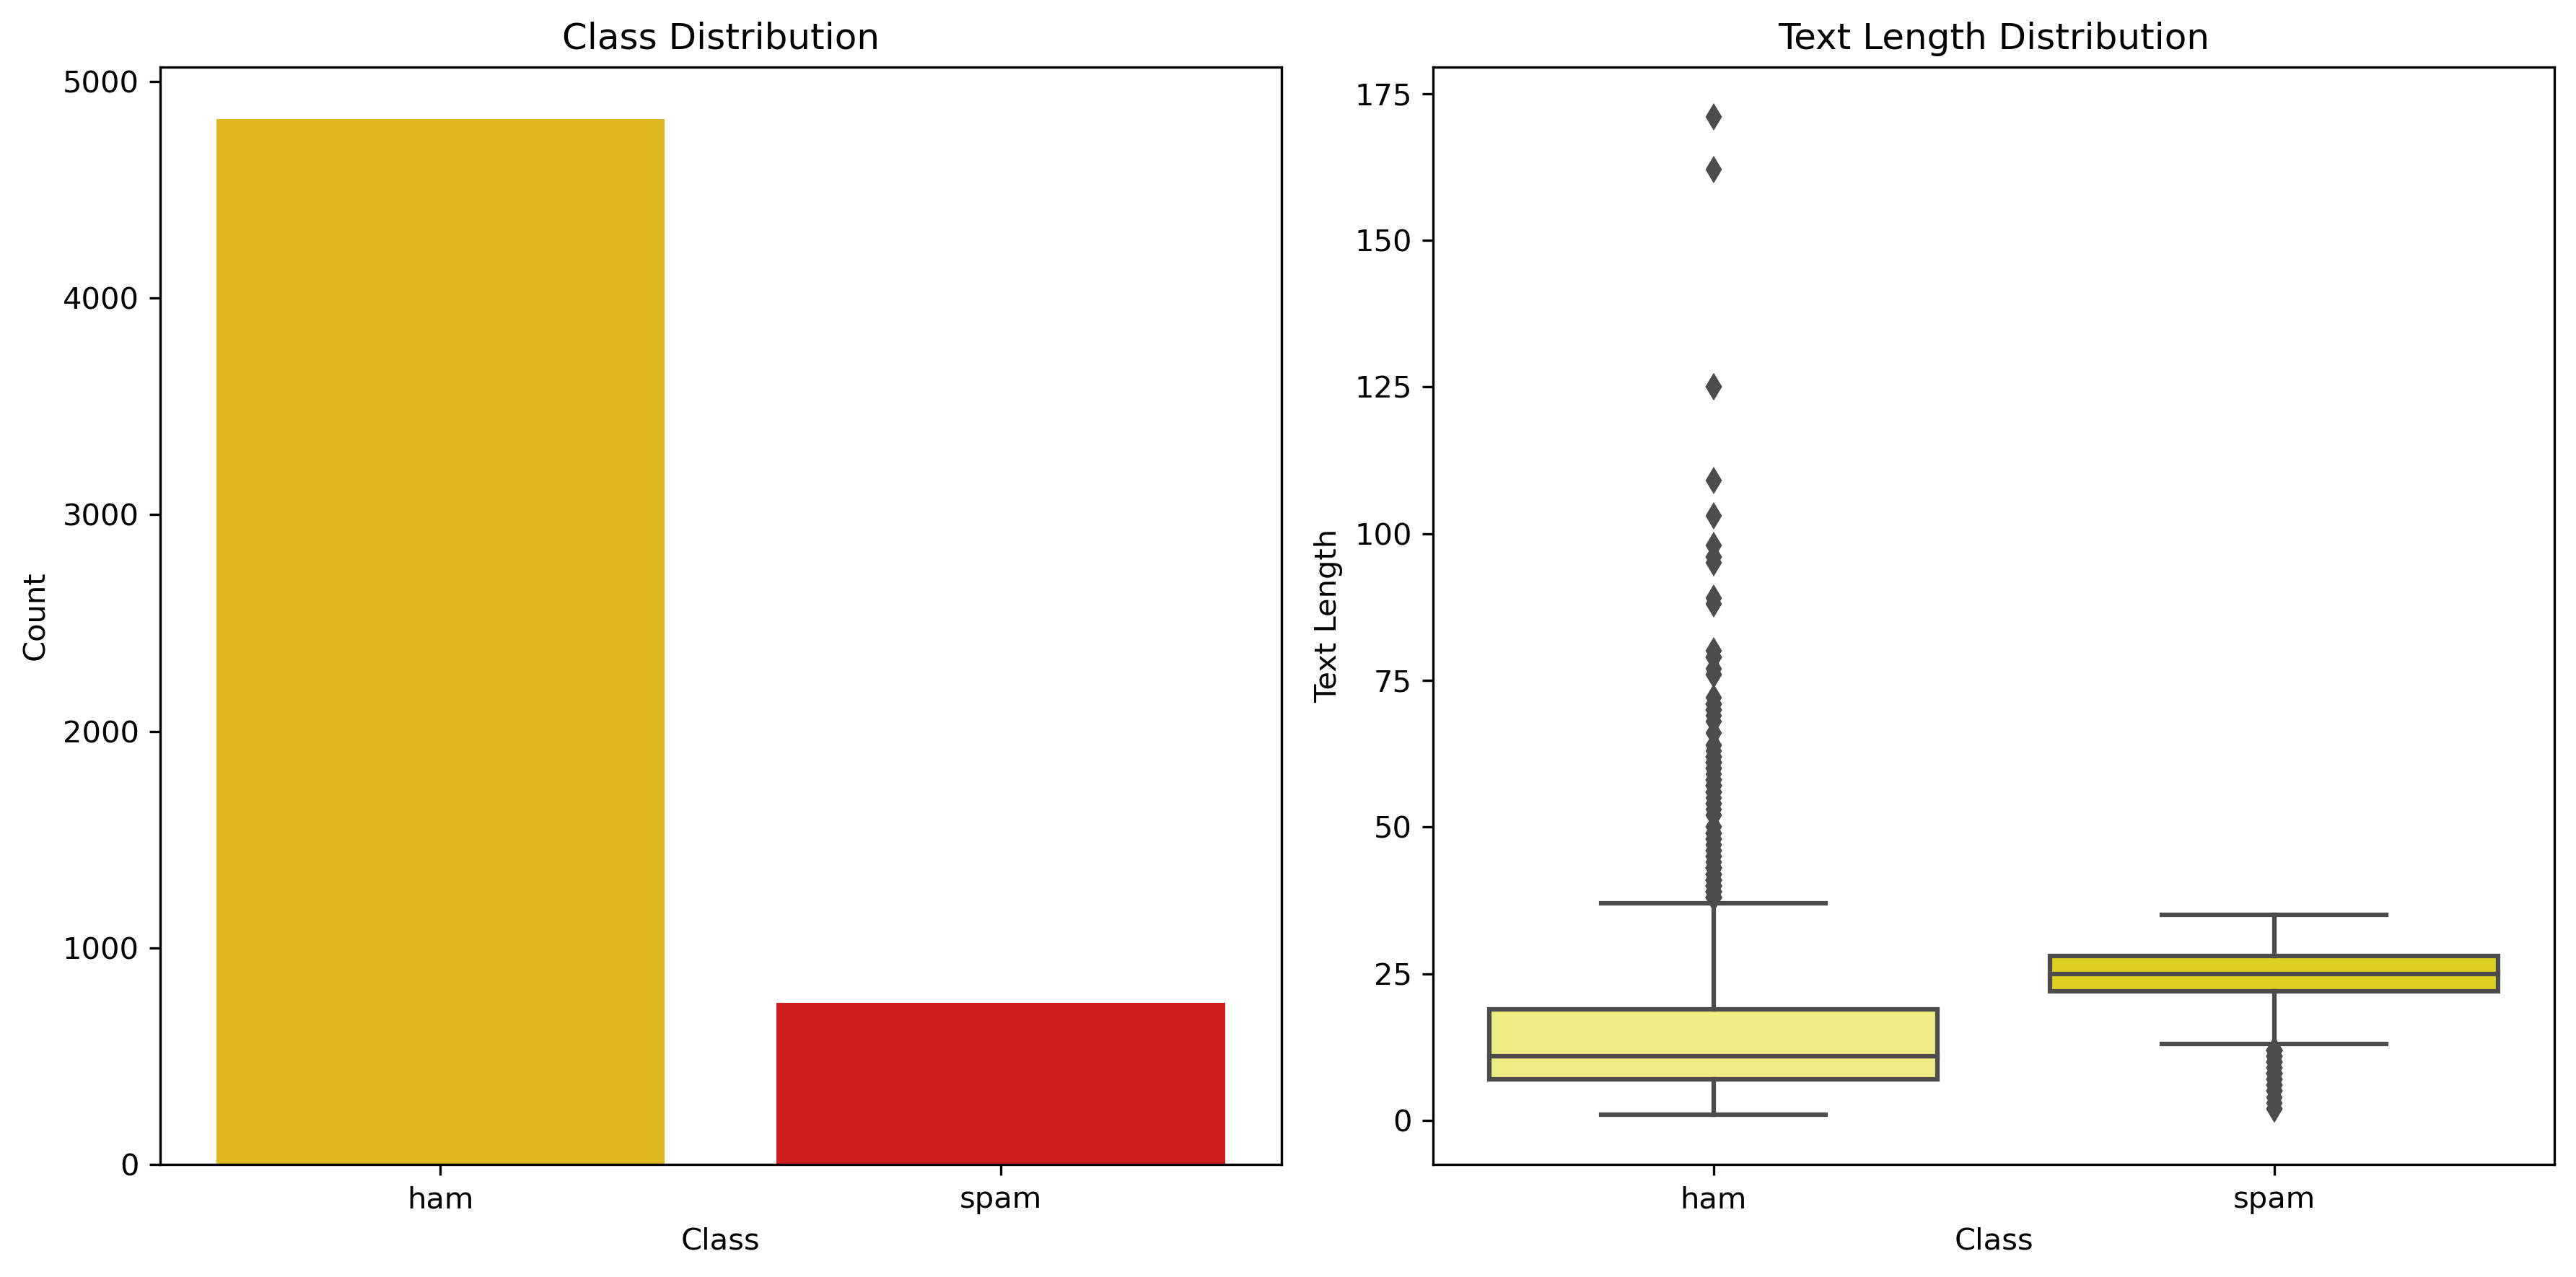

In [13]:
plt.figure(figsize=(12, 6), dpi=300)
plt.subplot(1, 2, 1)
sns.set_palette("hot_r",2)
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set_palette("hot_r")
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length Distribution')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

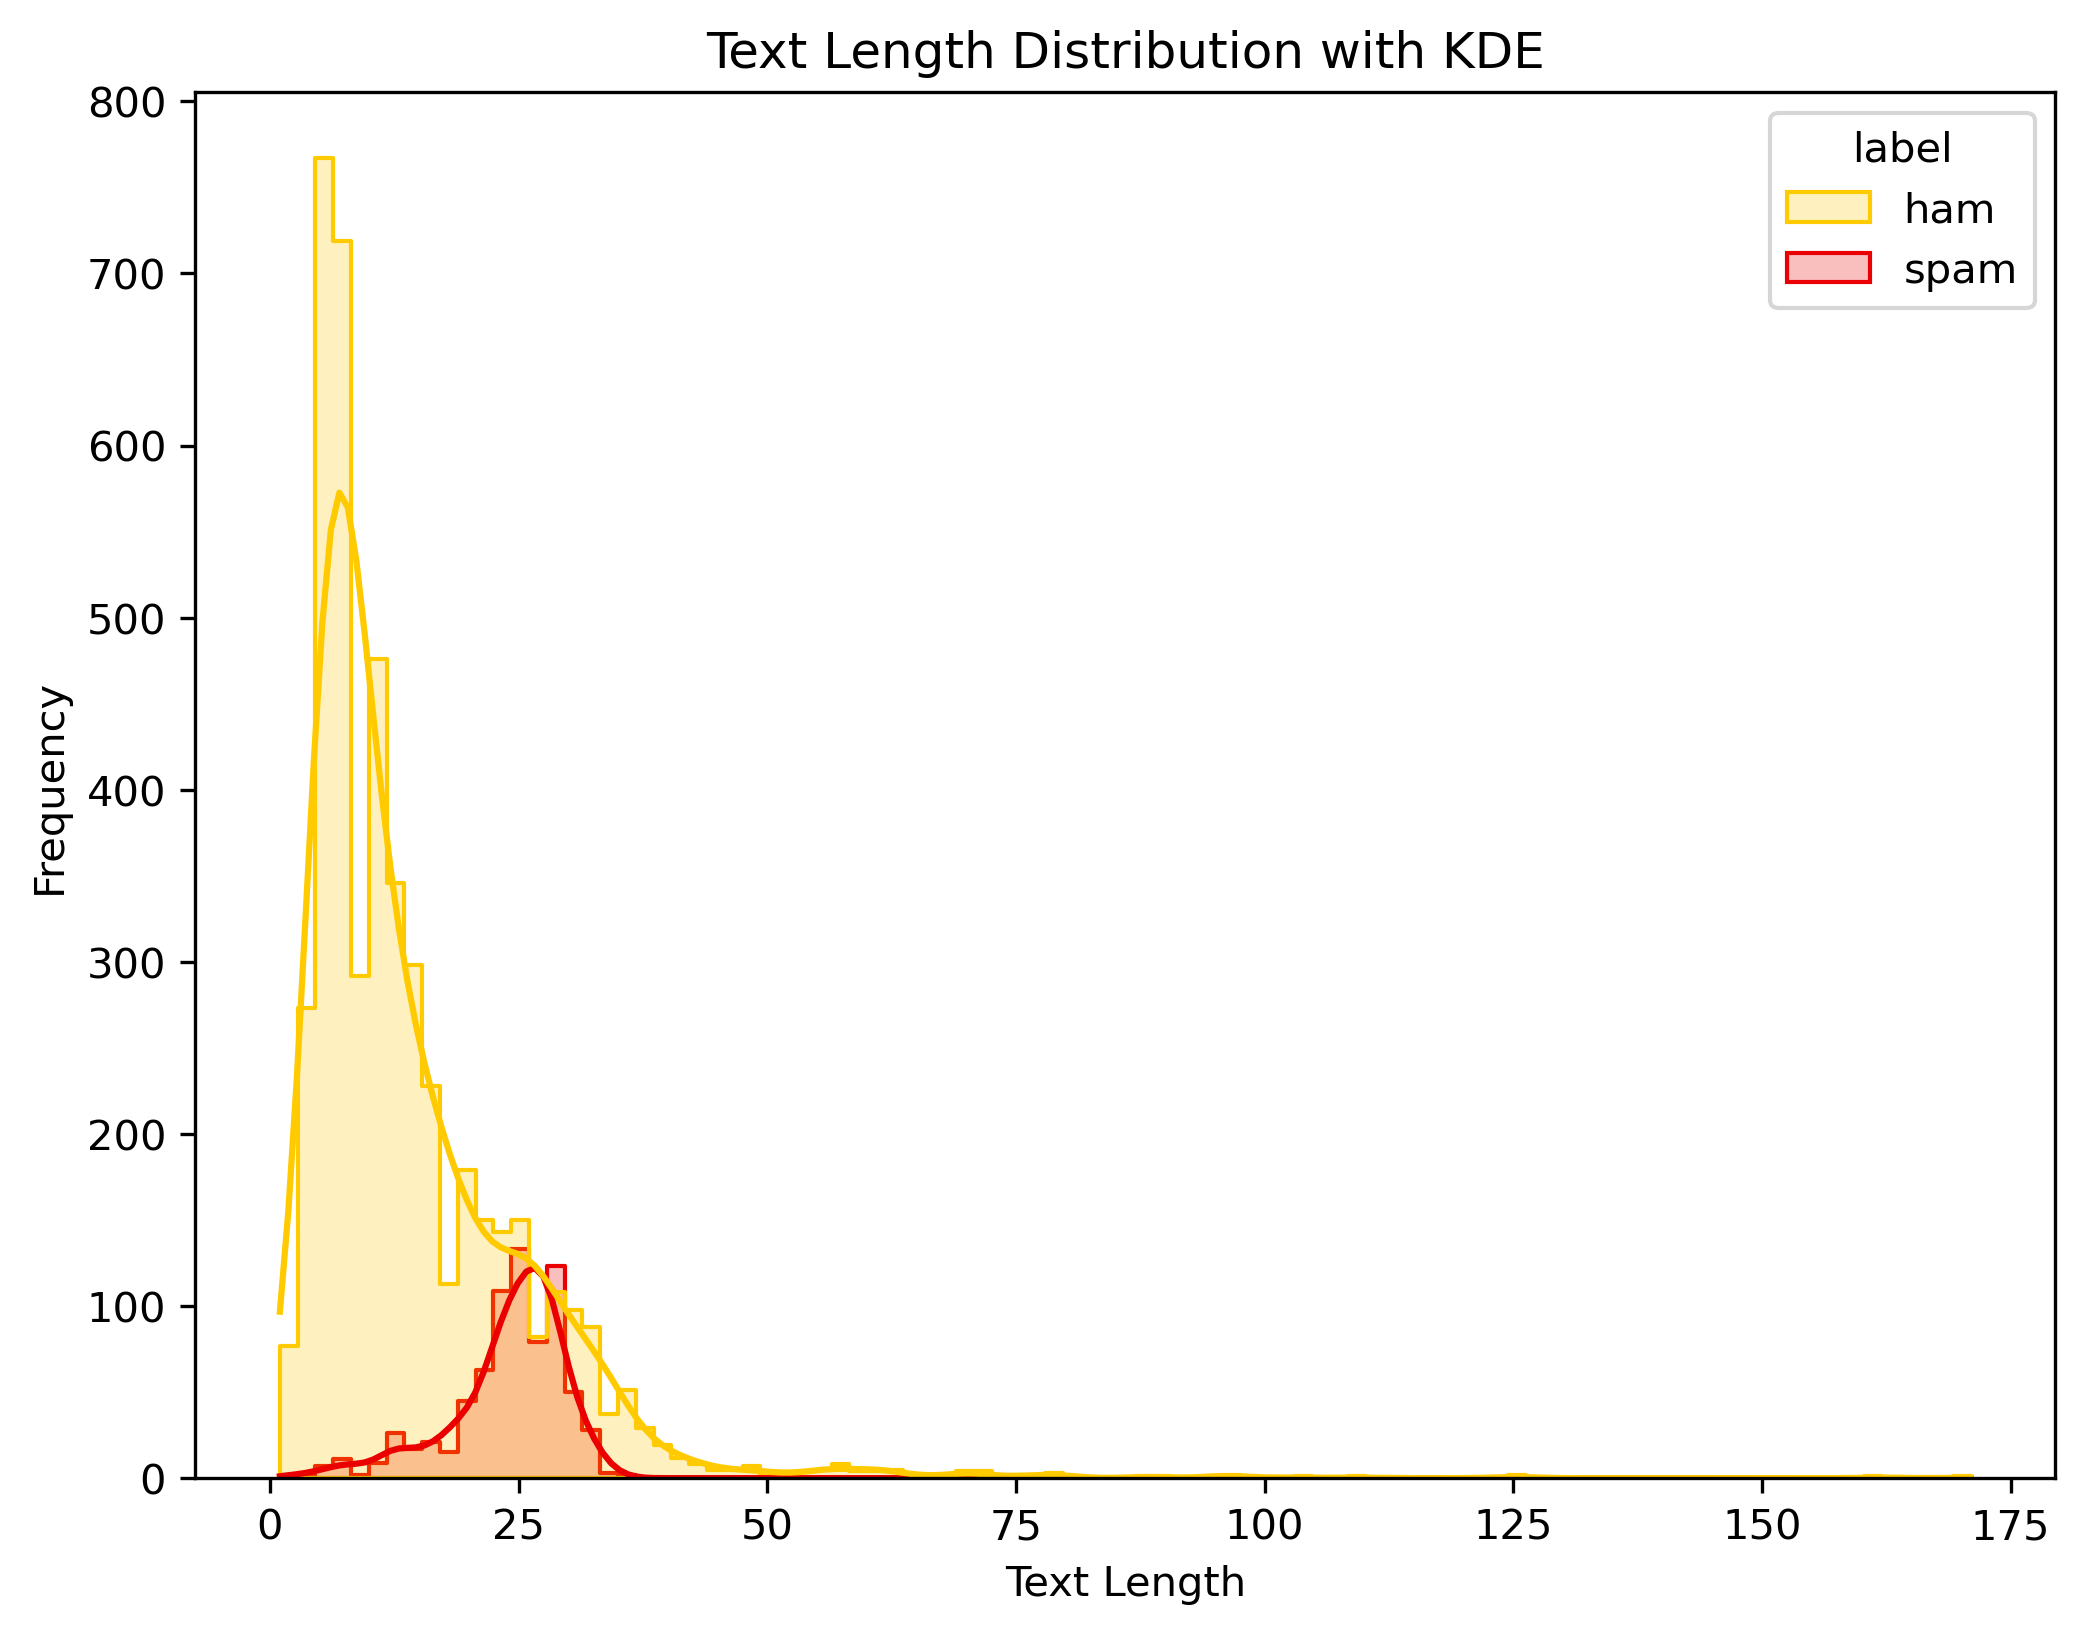

In [17]:
plt.figure(figsize=(8, 6), dpi=300)
sns.set_palette("hot_r",2 )
sns.histplot(data=df, x='text_length', hue='label', kde=True, element='step')
plt.title('Text Length Distribution with KDE')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [15]:
# create a world cloud for both ham and spam
cloud_ham = " ".join(df[df['label'] == "ham"]['text'])
cloud_spam = " ".join(df[df['label'] == "spam"]['text'])

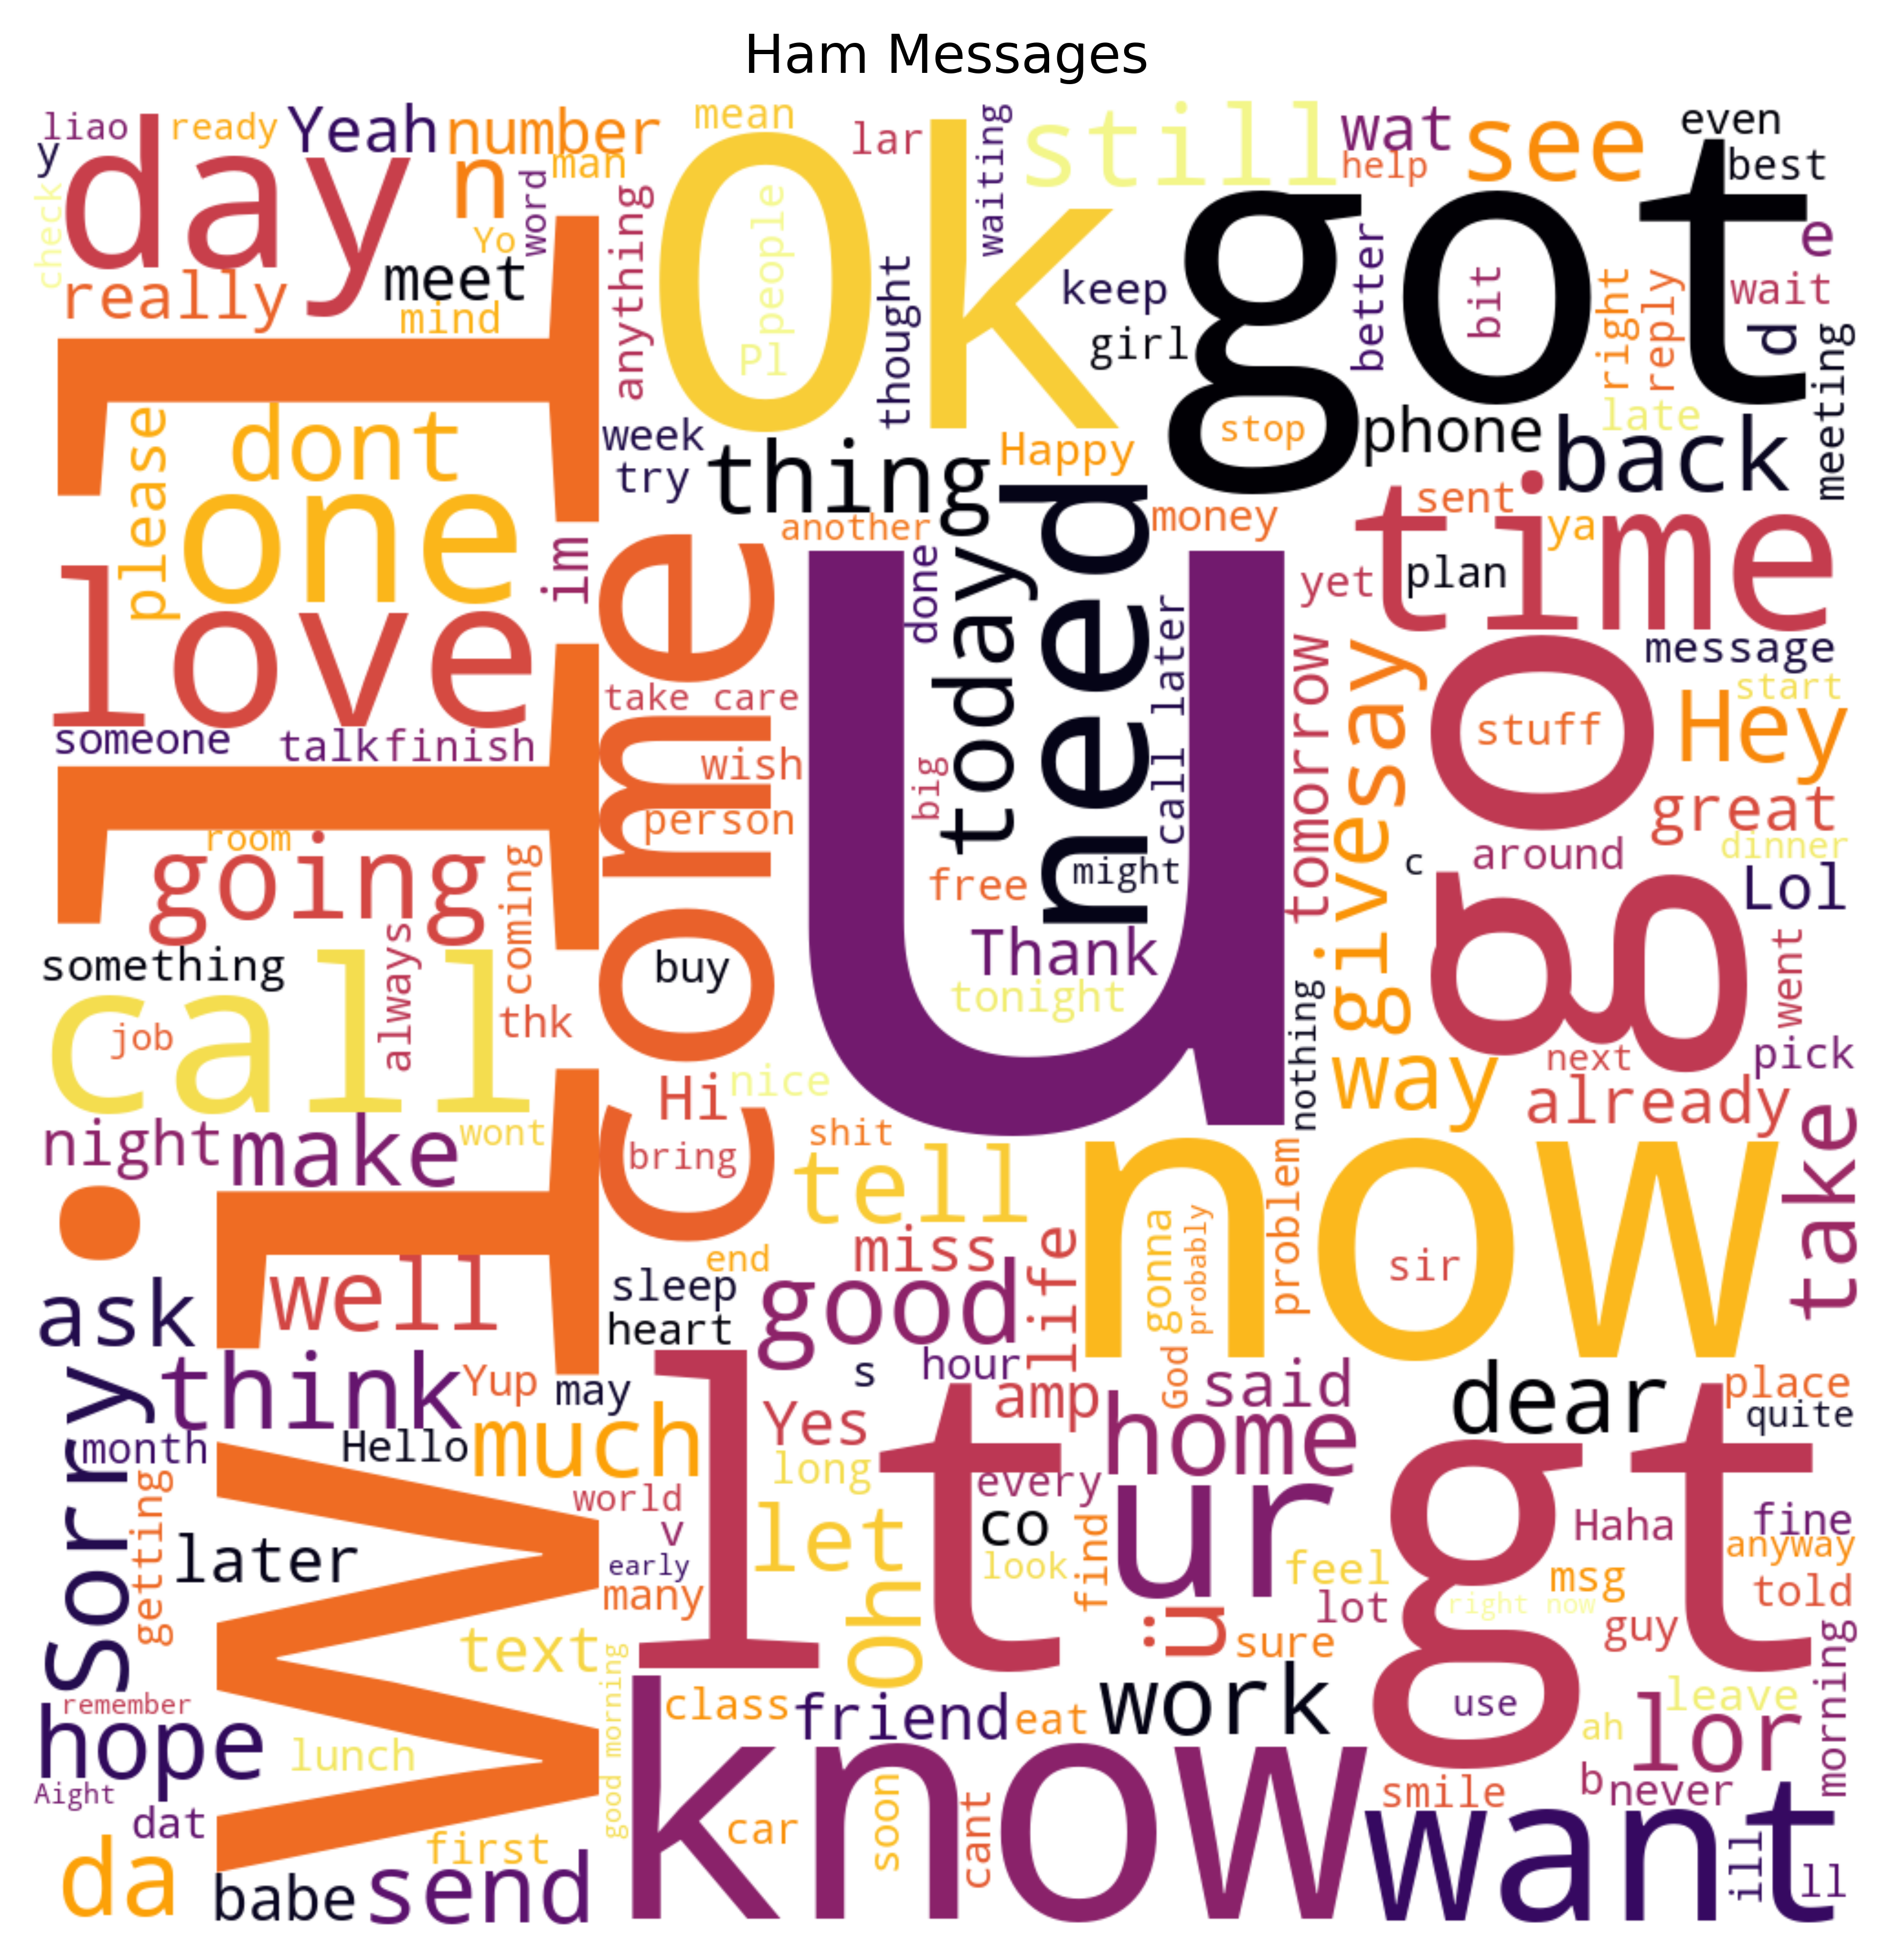

In [16]:
ham_wordcloud = WordCloud(width=1000, height=1000, background_color='white', colormap= "inferno").generate(cloud_ham)
ham_image = ham_wordcloud.to_array()
plt.figure(figsize=(12, 6), dpi=600)
plt.subplot(1, 2, 1)
plt.imshow(ham_image, interpolation='bilinear')
plt.title('Ham Messages')
plt.axis('off')

plt.tight_layout()
plt.show()

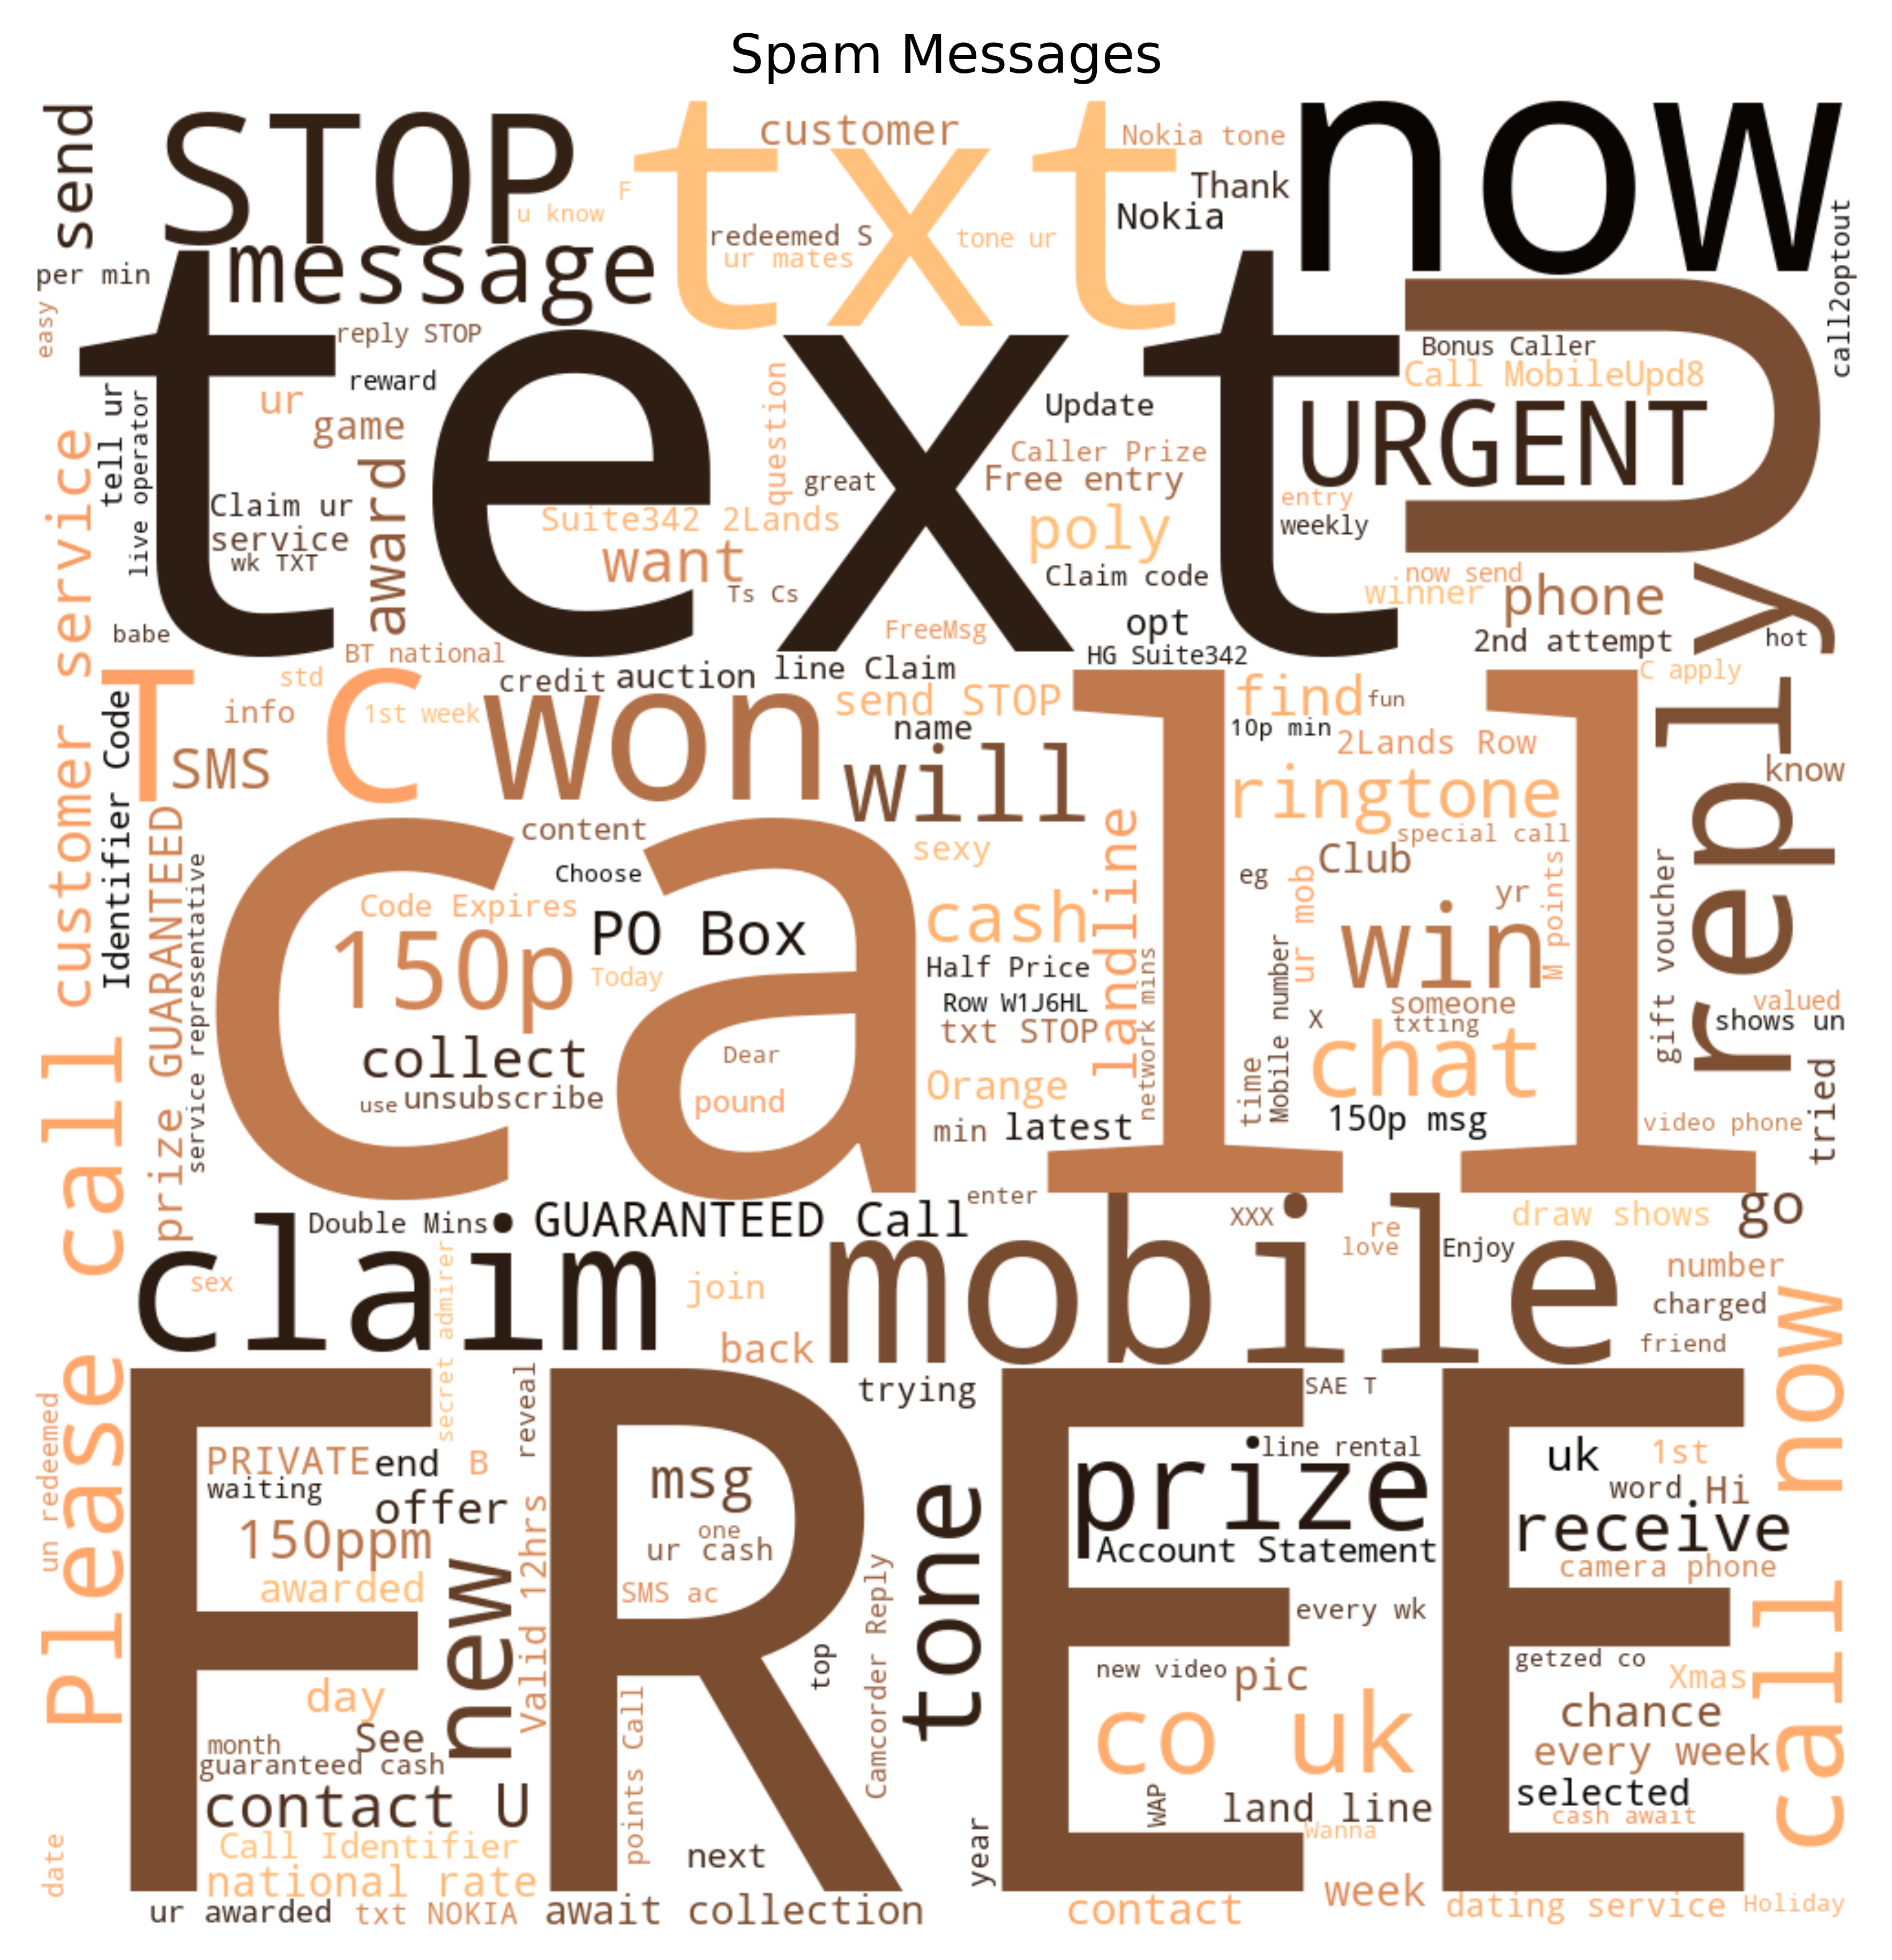

In [17]:
spam_wordcloud = WordCloud(width=1000, height=1000, background_color='white', colormap= "copper_r").generate(cloud_spam)
spam_image = spam_wordcloud.to_array()
plt.figure(figsize=(12, 6), dpi=600)
plt.subplot(1, 2, 2)
plt.imshow(spam_image, interpolation='bilinear')
plt.title('Spam Messages')
plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
def preprocess_text(text):
    #Tokenizing the dataset, removing stopwords and bring all words to lowercase
    words = word_tokenize(text) 
    words = [word.lower() for word in words if word.isalnum()] 
    words = [word for word in words if word not in stopwords.words("english")]
    return " ".join(words) 

In [19]:
df['text'] = df['text'].apply(preprocess_text)

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label']

In [63]:
#Split dataset for training and testing by 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#applying Algorithm on a model
sk_classifier = MultinomialNB()
sk_classifier.fit(X_train, y_train)

MultinomialNB()

In [65]:
#Define classifier for feature display and creating a constructor
class SklearnNLTKClassifier(nltk.classify.ClassifierI):
    def __init__(self, classifier):
        self._classifier = classifier
    
    def t_classify(self, features): 
        return self._classifier.predict([features])[1]
    
    def multi_classify(self, featuresets): 
        return self._classifier.predict(featuresets)

In [66]:
nltk_classifier = SklearnNLTKClassifier(sk_classifier)
y_pred = nltk_classifier.multi_classify(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
acc = f"Accuracy is : {accuracy:.2f}"
print (acc, report)

Accuracy is : 0.98               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



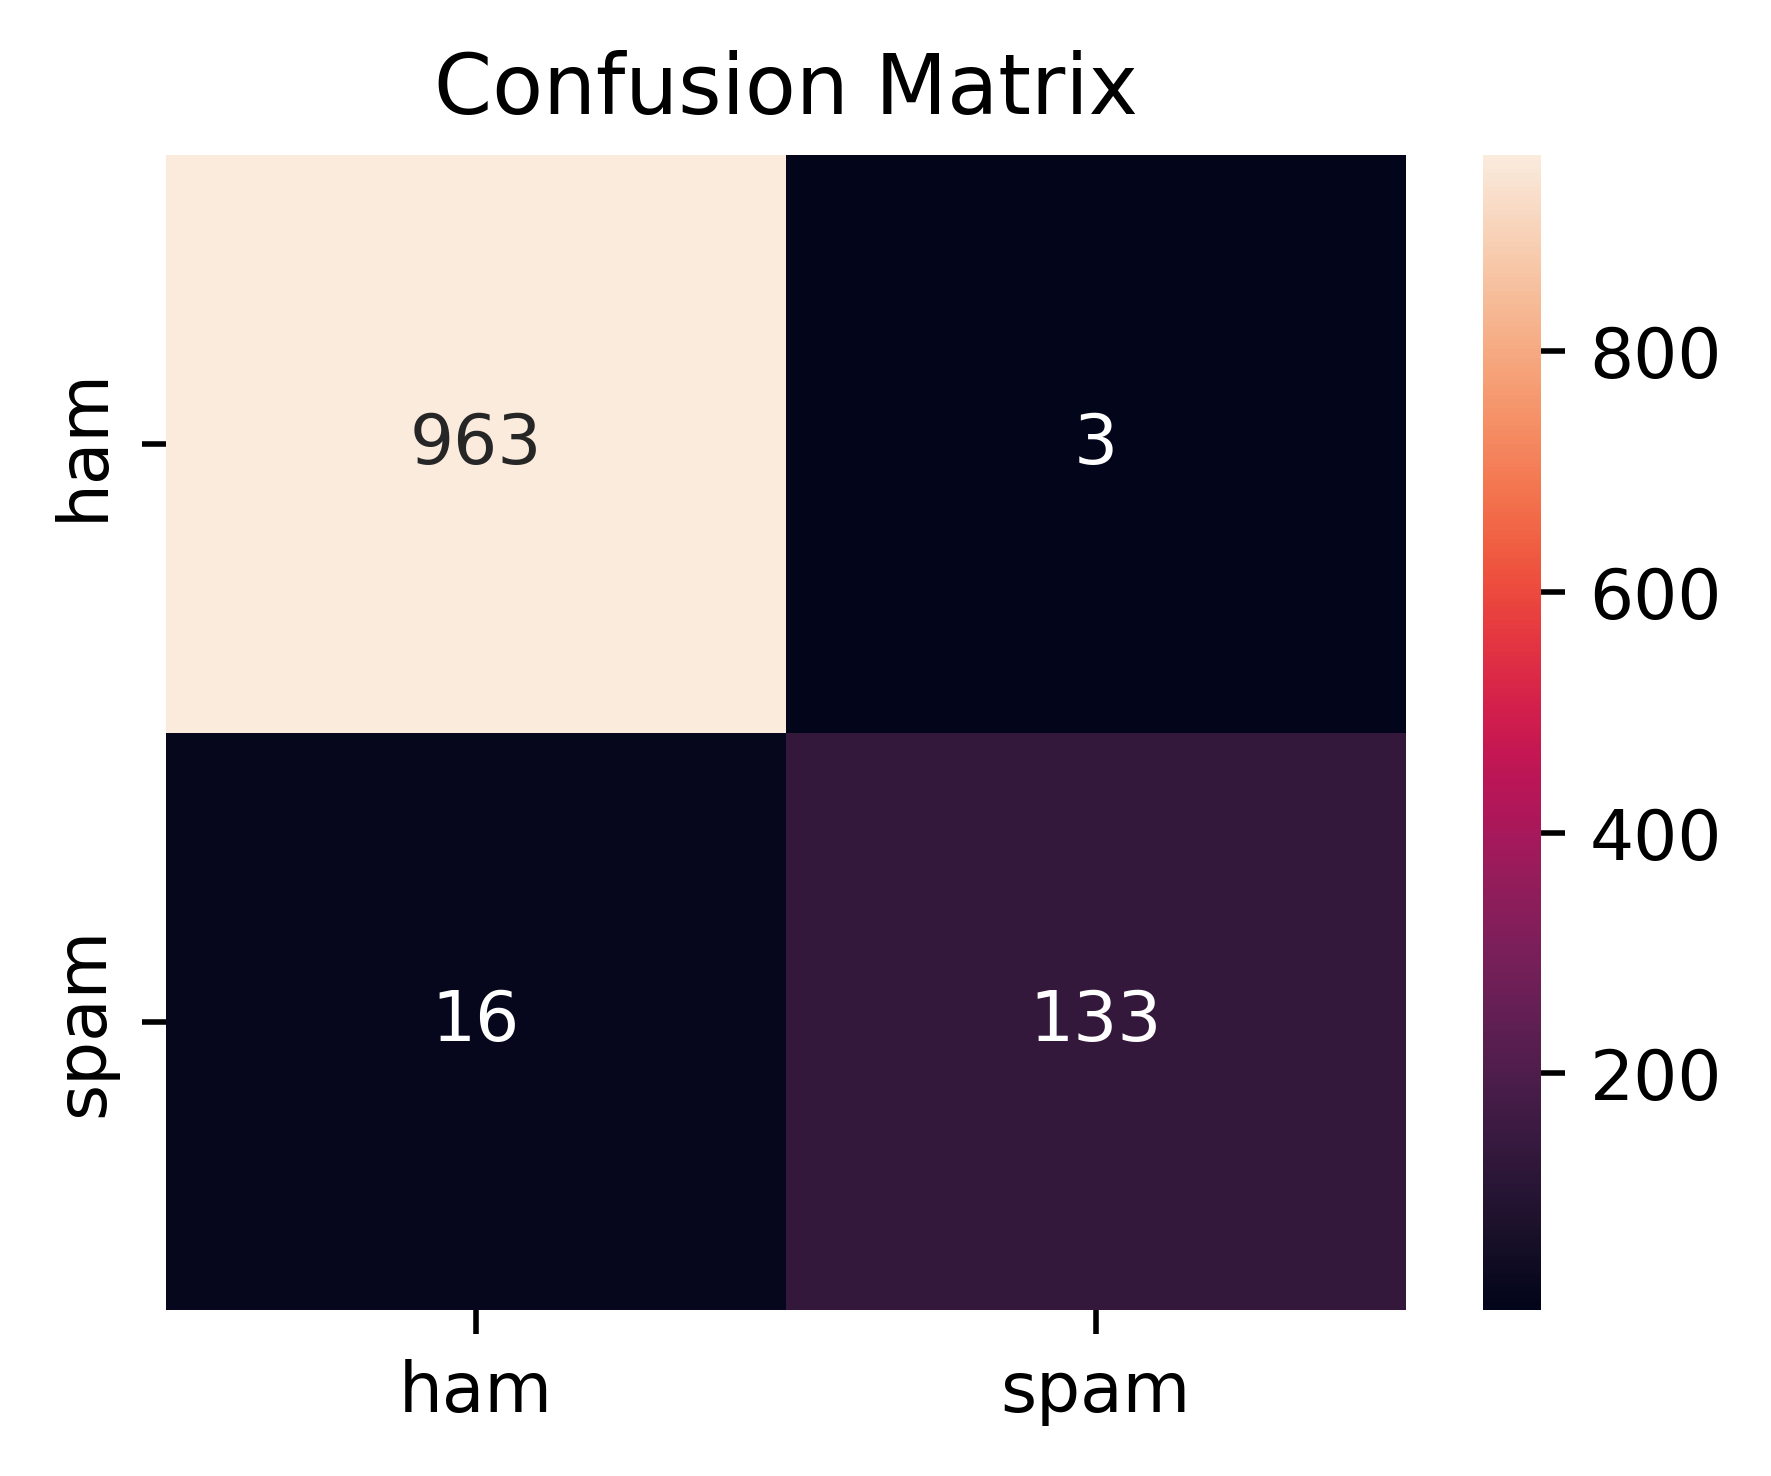

In [67]:
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3), dpi=500)
sns.heatmap(matrix, 
            annot=True, fmt='g', 
            xticklabels=['ham', 'spam'], 
            yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.show()